In [75]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
import numpy as np

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [76]:
#training data from https://github.com/IdleHandsProject/makennbot
x_train = [
  [ 0.0, 0.0, 0.0, 0.0, 0.0],
  [ 1.0, 1.0, 1.0, 1.0, 1.0],
  [ 0.0, 0.0, 1.0, 0.0, 0.0],
  [ 0.0, 1.0, 1.0, 1.0, 0.0],
  [ 0.5, 0.5, 0.5, 0.5, 0.5],
  [ 0.0, 0.0, 0.5, 0.0, 0.0],
]
y_train = [
  [ 1.0, 1.0],
  [ 0.0, 0.0],
  [ 0.6, 0.7],
  [ 0.8, 0.2],
  [ 0.6, 0.6],
  [ 0.5, 0.6],
]

x_train = np.array(x_train)
y_train = np.array(y_train)

In [77]:
model = Sequential()

IN = x_train.shape[1]
HIDDEN = IN + 1
OUT = y_train.shape[1]

model.add(Dense(units=HIDDEN, activation='sigmoid', input_dim=IN, dtype='float16'))
model.add(Dense(units=OUT, activation='sigmoid', dtype='float16'))

model.compile(loss='mean_squared_error',
              optimizer=optimizers.SGD(learning_rate=0.5, momentum=0.9))


In [78]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        #self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        #plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

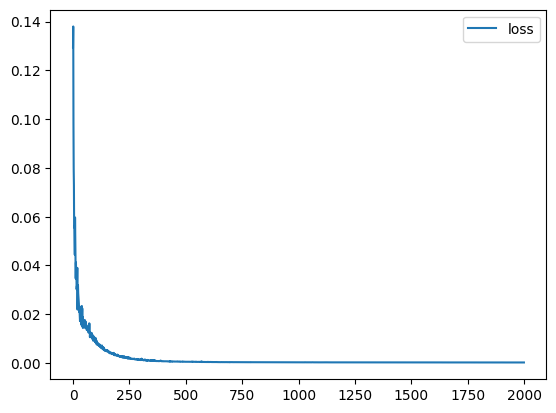

In [79]:
#callback = keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001)
model.fit(x_train, y_train, epochs=2000, batch_size=1, verbose=False, callbacks=[plot_losses])

In [80]:
preds = model.predict(x_train).tolist()
for i, pred in enumerate(preds):
    print('model:\t', np.round(pred,2))
    print('label:\t', y_train[i])
    print(' ')

1/1 [==============================] - 0s 126ms/step
model:	 [0.97 0.96]
label:	 [1. 1.]
 
model:	 [0.01 0.01]
label:	 [0. 0.]
 
model:	 [0.6 0.7]
label:	 [0.6 0.7]
 
model:	 [0.8 0.2]
label:	 [0.8 0.2]
 
model:	 [0.6 0.6]
label:	 [0.6 0.6]
 
model:	 [0.51 0.61]
label:	 [0.5 0.6]
 


In [81]:
def to_str(name, W):
    s = str(W.tolist()).replace('[', '').replace(']', '\n').replace(',', '\nlong ')
    return 'f'+name+'\nlong ' + s + 'fEnd'+name

In [82]:
# output weights as strings you can copy into arduino sketch
W1 = np.vstack((K.eval(model.weights[0]), K.eval(model.weights[1])))
W2 = np.vstack((K.eval(model.weights[2]), K.eval(model.weights[3])))

print('// replace these two lines in spin2 code:')
print('// float HiddenWeights[InputNodes+1][HiddenNodes]')
print('// float OutputWeights[HiddenNodes+1][OutputNodes]')
print('// With trained weights below.')
print('\n')
print(to_str('HiddenWeights', W1))
print(to_str('OutputWeights', W2))

// replace these two lines in spin2 code:
// float HiddenWeights[InputNodes+1][HiddenNodes]
// float OutputWeights[HiddenNodes+1][OutputNodes]
// With trained weights below.


fHiddenWeights
long -0.9814453125
long  1.6611328125
long  1.2294921875
long  1.9384765625
long  1.9365234375
long  0.392578125

long  -0.188232421875
long  -0.7158203125
long  1.4345703125
long  1.2646484375
long  0.488525390625
long  1.591796875

long  2.779296875
long  -0.404052734375
long  -8.1953125
long  0.035125732421875
long  -0.1109619140625
long  -0.31689453125

long  -0.08349609375
long  -1.740234375
long  1.5517578125
long  1.0654296875
long  0.483642578125
long  1.2265625

long  -0.391845703125
long  1.9873046875
long  1.1337890625
long  1.1201171875
long  2.197265625
long  0.2249755859375

long  -2.7578125
long  0.6669921875
long  1.6826171875
long  -4.0
long  -3.388671875
long  -2.0

fEndHiddenWeights
fOutputWeights
long 1.9052734375
long  2.255859375

long  -3.580078125
long  0.1651611328125

long